In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [2]:
# Importing the data 
df = pd.read_csv('Downloads/titanic.csv')
df = df.drop(['Name','Unnamed: 0', 'Cabin', 'Ticket', 'PassengerId'], axis=1 )
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [3]:
df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [4]:
# filling in the missing values of the Embark column with the most Frequent
most_frequent_value = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_frequent_value)



In [5]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [6]:
# filling in the the missing numerical values with their means
df = df.fillna(df.mean())

/var/folders/wb/ylp2wb51397cgbs8cn3qck3c0000gn/T/ipykernel_73163/4108003291.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [7]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
# Encoding the Sex and Embarked columns
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

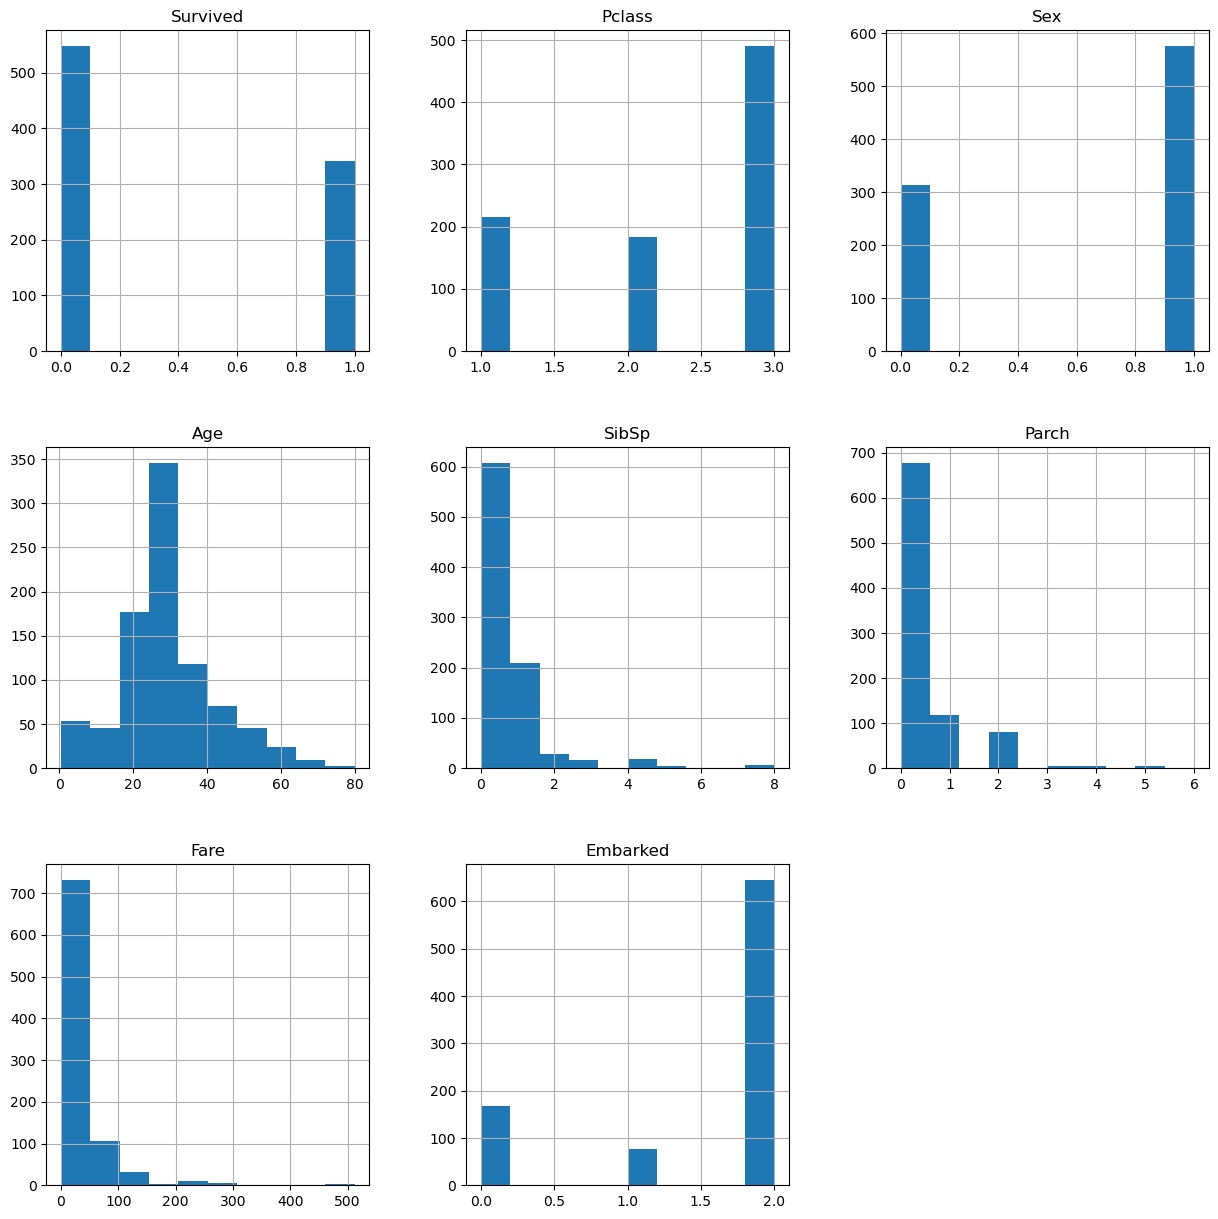

In [9]:
df.hist(figsize=(15,15))

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

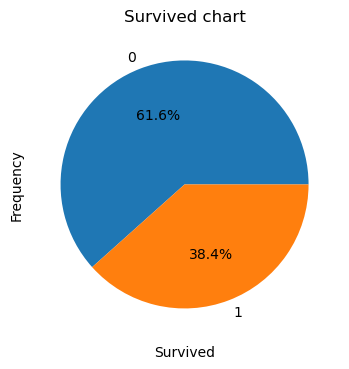

In [11]:
plt.figure(figsize=(4,6))
df['Survived'].value_counts().plot(kind='pie',autopct='%1.1f%%')

plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.title("Survived chart")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

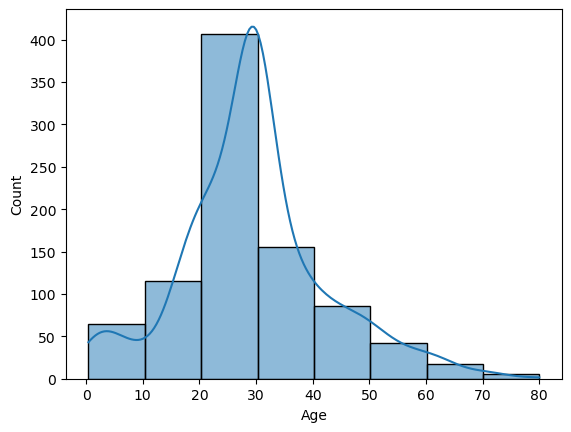

In [12]:
# the age distribution, which shows the data has more of 20-30 age group
sns.histplot(data=df, x='Age', kde=True, bins=8)

<Axes: xlabel='Fare', ylabel='Count'>

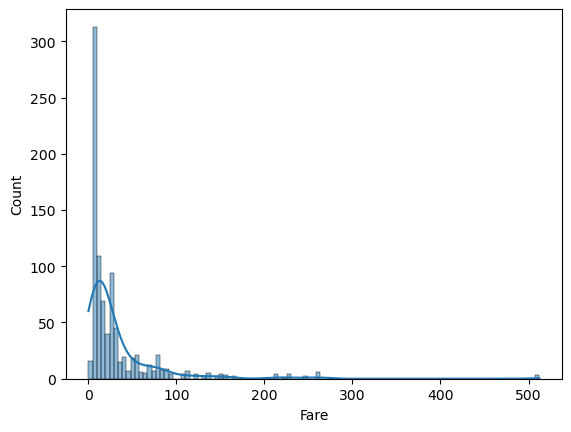

In [13]:
# the fare distribution
sns.histplot(data=df, x='Fare', kde=True)

In [14]:
# creating the X independent variable and y dependent variable
X = df.drop(['Survived'], axis=1)
y = df['Survived']


In [15]:
#Splitting into the training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [16]:
#from sklearn.preprocessing import RobustScaler
#sc = RobustScaler()

#X_train = sc.fit_transform(X_train)
#y_train = sc.fit_transform(X_train)
#y_train

In [17]:
# fitting the RandomForest Classifier on the data
rand_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rand_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [18]:

y_pred = rand_classifier.predict(X_test)
#y_pred

In [19]:
# Model Evaluation
print("Accuracy Score: ", accuracy_score(y_test, y_pred) * 100)
print("\n\nMean Squared Error: ", mean_squared_error(y_test, y_pred))
print("\n\nClassification Report\n", classification_report(y_test, y_pred))
print("\n\nConfusion Matris\n", confusion_matrix(y_test, y_pred))



Accuracy Score:  81.56424581005587


Mean Squared Error:  0.18435754189944134


Classification Report
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



Confusion Matris
 [[95 10]
 [23 51]]


In [23]:
from catboost import CatBoostClassifier
cat_classifier = CatBoostClassifier(learning_rate =0.1, max_depth =8, verbose=0)
cat_classifier.fit(X_train, y_train)


y_pred_c = cat_classifier.predict(X_test)



In [24]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_c) * 100)
print("\n\nMean Squared Error: ", mean_squared_error(y_test, y_pred_c))
print("\n\nClassification Report\n", classification_report(y_test, y_pred_c))
print("\n\nConfusion Matris\n", confusion_matrix(y_test, y_pred_c))



Accuracy Score:  80.44692737430168


Mean Squared Error:  0.19553072625698323


Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



Confusion Matris
 [[87 18]
 [17 57]]


In [ ]:
features = X_train.columns
importances = cat_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()